**Perform basic preprocessing on data**


In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install tqdm
%matplotlib inline

ERROR:root:File `'src/load_data.py'` not found.


In [2]:
cd ..

In [3]:
%run src/load_data.py

In [31]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
df_gelman                    DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
df_original                  DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
df_standard                  DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc

In [47]:
df_original = pd.DataFrame(numeric_df)


In [45]:
df_original = df_original.loc[:, (df_original != 0).any(axis=0)]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2003.0,548,0,61,0,0,0,0,0,2008
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1976.0,460,298,0,0,0,0,0,0,2007
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2001.0,608,0,42,0,0,0,0,0,2008
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1998.0,642,0,35,272,0,0,0,0,2006
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2000.0,836,192,84,0,0,0,0,0,2008


In [27]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

df_gelman = apply_scale(df_original, gelman_scale)
df_standard = apply_scale(df_original, standard_scale)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


ValueError: num must be 1 <= num <= 21, not 22

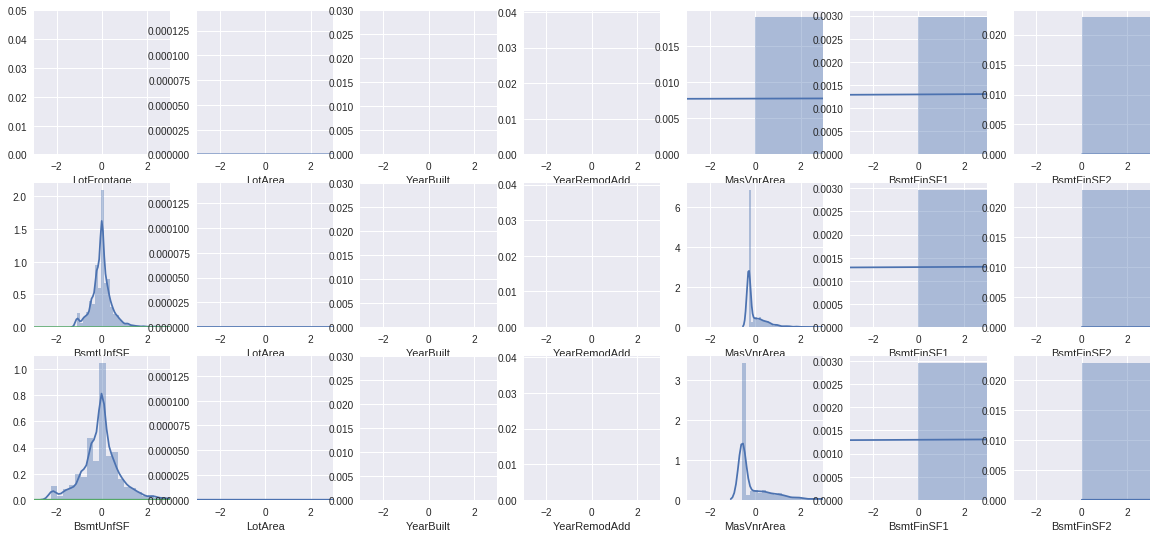

In [28]:
fig = plt.figure(figsize=(20,9))
for i, col in enumerate(df_original.columns):
    fig.add_subplot(3,7,1+i)
    sns.distplot(df_original[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,8+i)
    sns.distplot(df_gelman[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,15+i)
    sns.distplot(df_standard[col])
    plt.xlim(-3,3)